In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Plot constants and colors
BAR_COLOR = '#e66707'
TICK_COLOR = '#000000'
TITLE_FONT_SIZE= 16
LABEL_FONT_SIZE= 14
################################

In [155]:
# Training and testing data loading

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic_data/titanic_train.csv')
test_df  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic_data/titanic_test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId, Ticket and cabin** feature can be dropped immediately as they seem irrelevant to chance of survival.

**Pclass and Fare** feature shows how wealthy is someone and have correlation to survival chance as richer have higher odds.

Woman and children have higher chance of survival so **Sex and Age** features are correlated to survival.

**SibSp, Parch and Embarked** features are yet to be determined are they correlated to survival.

**Name** feature on the first hand may seem irrelevant, however there are some tokens such as Mr or Miss, etc. that repeats a lot of time and may be correlated to survival so we will leave them for now.

In [156]:
# Dropping irrelevant features

train_df = train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**Age and Embarked** features contain missing values, so we are going to fill them in. Embarked feature missing only 2 values and may seem less important correlation to survival so we are going to fill NaN with most frequent value.

Since Age feature missing a lot of values it could be filled with either median value or random value between median and std or with median value for Sex and Pclass features only since they seem most correlated with Age while others have little to no correlation with Age.

In [160]:
# filling Embarked NaN

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].describe()[2])

# filling Age NaN
# We are going to iterate over dataset and for each NaN in Age column replace it with age median value for each
# Sex and Pclass.

age_median_values = train_df[['Sex','Pclass','Age']].groupby(['Sex','Pclass'], as_index=False).median()

for i in ['male','female']:
    for j in [1,2,3]:
        train_df.loc[(train_df['Age'].isnull()) & (train_df.Sex == i) & (train_df.Pclass == j), 'Age'] = \
        int(age_median_values[(age_median_values.Sex == i) & (age_median_values.Pclass == j)]['Age'])

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [173]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.088855,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.318340,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Male/Female ratio is: 1.84

Survival rate by Passenger class (%)
         Survived
Pclass           
1       62.962963
2       47.282609
3       24.236253


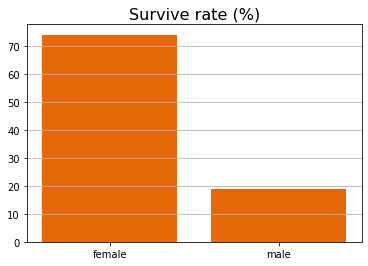

In [236]:
tmp = train_df['Sex'].value_counts()['male']/train_df['Sex'].value_counts()['female']
print("Male/Female ratio is: " + str(round(tmp,2))+ "\n")

tmp = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
print("Survival rate by Passenger class (%)")
print(tmp*100)

tmp = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
plt.bar(tmp['Sex'],tmp['Survived']*100, color=BAR_COLOR)
plt.title("Survive rate (%)", fontsize=TITLE_FONT_SIZE, color=TICK_COLOR)
plt.grid(axis='y')

Text(0.5, 1.0, 'number of males and females ')

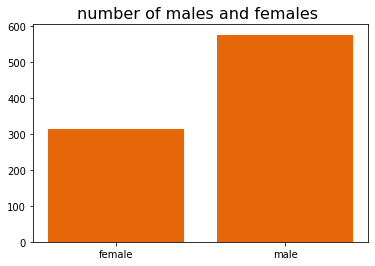

In [206]:
# ___Test Cell___
plt.figure(figsize=(6, 4))
plt.subplots_adjust(hspace = 0.4)

tmp = train_df['Sex'].value_counts().sort_values(ascending=True)
plt.bar(tmp.index, tmp, color=BAR_COLOR)
plt.title("number of males and females ", fontsize=TITLE_FONT_SIZE, color=TICK_COLOR)